In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

In [2]:
DATASET_DIR = r"D:/Practicle/DL/dataset/Object Detection(Ass6)/caltech-101-img"
IMG_SIZE = (160, 160)
BATCH_SIZE = 32
EPOCHS = 10   # fast training

# Data Loading + Preprocessing

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset='training',
    class_mode='categorical'
)

val_gen = datagen.flow_from_directory(
    DATASET_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset='validation',
    class_mode='categorical'
)

num_classes = train_gen.num_classes

Found 7357 images belonging to 102 classes.
Found 1788 images belonging to 102 classes.


In [3]:
# a. Load Pre-trained Model

base_model = MobileNetV2(
    input_shape=(160, 160, 3),
    include_top=False,
    weights='imagenet'
)

In [4]:
# b. Freeze lower layers
base_model.trainable = False

In [5]:
# c. Add custom classifier

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
preds = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=preds)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 160, 160, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1 (Conv2D)                │ (None, 80, 80, 32)        │             864 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bn_Conv1 (BatchNormalization) │ (None, 80, 80, 32)        │             128 │ Conv1[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ Conv1_relu (ReLU)             │ (None, 80, 80, 32)        │               0 │ bn_Conv1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise       │ (None, 80, 80, 32)        │             288 │ Conv1_relu[0][0]           │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_BN    │ (None, 80, 80, 32)        │             128 │ expanded_conv_depthwise[0… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_depthwise_relu  │ (None, 80, 80, 32)        │               0 │ expanded_conv_depthwise_B… │
│ (ReLU)                        │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project         │ (None, 80, 80, 16)        │             512 │ expanded_conv_depthwise_r… │
│ (Conv2D)                      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ expanded_conv_project_BN      │ (None, 80, 80, 16)        │              64 │ expanded_conv_project[0][… │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand (Conv2D)       │ (None, 80, 80, 96)        │           1,536 │ expanded_conv_project_BN[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_BN             │ (None, 80, 80, 96)        │             384 │ block_1_expand[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_expand_relu (ReLU)    │ (None, 80, 80, 96)        │               0 │ block_1_expand_BN[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_pad (ZeroPadding2D)   │ (None, 81, 81, 96)        │               0 │ block_1_expand_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block_1_depthwise             │ (None, 40, 40, 96)        │             864 │ block_1_pad[0][0]          │
│ (DepthwiseConv2D)             │                           │               

 Total params: 2,612,134 (9.96 MB)

 Trainable params: 354,150 (1.35 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [6]:
# d. Train classifier layers

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 36s 144ms/step - accuracy: 0.6138 - loss: 1.7519 - val_accuracy: 0.8249 - val_loss: 0.6317
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 32s 141ms/step - accuracy: 0.8585 - loss: 0.5249 - val_accuracy: 0.8691 - val_loss: 0.4409
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 33s 143ms/step - accuracy: 0.9089 - loss: 0.3144 - val_accuracy: 0.8809 - val_loss: 0.4204
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 33s 141ms/step - accuracy: 0.9290 - loss: 0.2377 - val_accuracy: 0.8842 - val_loss: 0.3927
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 33s 145ms/step - accuracy: 0.9459 - loss: 0.1794 - val_accuracy: 0.8909 - val_loss: 0.3994
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 33s 145ms/step - accuracy: 0.9519 - loss: 0.1517 - val_accuracy: 0.8865 - val_loss: 0.3867
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 41s 145ms/step - accuracy: 0.9630 - loss: 0.1231 - val_accuracy: 0.8865 - val_loss: 0.4036
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 33s 145ms/step - accuracy: 0.9618 - loss: 0

In [7]:
# e. Fine-tune (optional but required by assignment)
# Unfreeze last 30 layers of MobileNetV2

for layer in base_model.layers[-30:]:
    layer.trainable = True

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),  # low LR
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_ft = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5
)

Epoch 1/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 49s 192ms/step - accuracy: 0.9044 - loss: 0.3251 - val_accuracy: 0.8960 - val_loss: 0.3890
Epoch 2/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 44s 192ms/step - accuracy: 0.9390 - loss: 0.2046 - val_accuracy: 0.9032 - val_loss: 0.3660
Epoch 3/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 42s 185ms/step - accuracy: 0.9496 - loss: 0.1569 - val_accuracy: 0.9027 - val_loss: 0.3570
Epoch 4/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 43s 185ms/step - accuracy: 0.9576 - loss: 0.1341 - val_accuracy: 0.9055 - val_loss: 0.3447
Epoch 5/5
230/230 ━━━━━━━━━━━━━━━━━━━━ 42s 181ms/step - accuracy: 0.9633 - loss: 0.1176 - val_accuracy: 0.9032 - val_loss: 0.3457


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_img(model, path):
    img = image.load_img(path, target_size=(160,160))
    arr = np.expand_dims(image.img_to_array(img)/255.0, 0)

    pred = model.predict(arr)
    cls = list(train_gen.class_indices.keys())[np.argmax(pred)]

    plt.imshow(image.load_img(path))
    plt.axis("off")
    plt.title(cls)
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


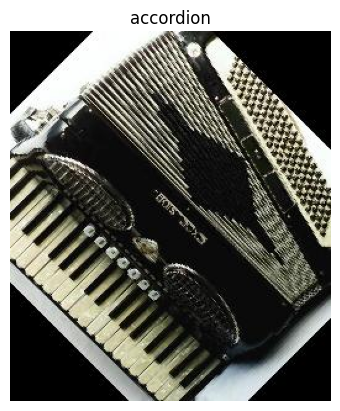

In [10]:
img_path = r"D:/Practicle/DL/dataset/Object Detection(Ass6)/caltech-101-img/accordion/image_0001.jpg"
predict_img(model, img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


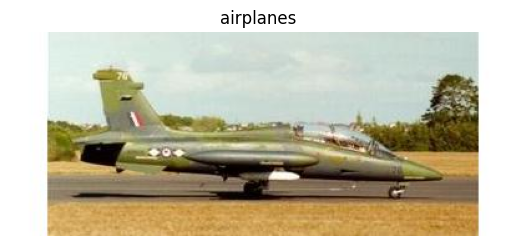

In [11]:
img_path = r"D:/Practicle/DL/dataset/Object Detection(Ass6)/caltech-101-img/airplanes/image_0001.jpg"
predict_img(model, img_path)